In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
from reedsolo import ReedSolomonError

Test Case 1 -Getting Started...

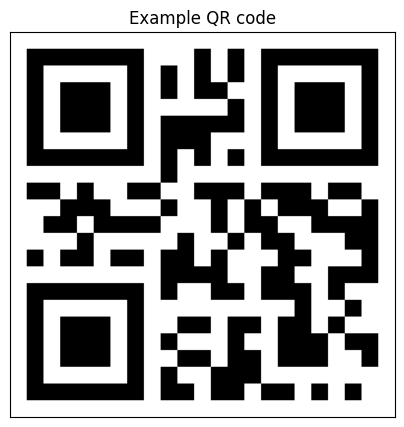

In [108]:
##Read the img and read it in grey scale
img = cv2.imread("01-Getting-started.png", cv2.IMREAD_GRAYSCALE)

##Plot the image
fig = plt.figure(figsize=(5,5))
plt.xticks([], [])
plt.yticks([], [])
plt.title('Example QR code')
plt.imshow(img, cmap='gray')
plt.show()


In [109]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

44 968 44 968


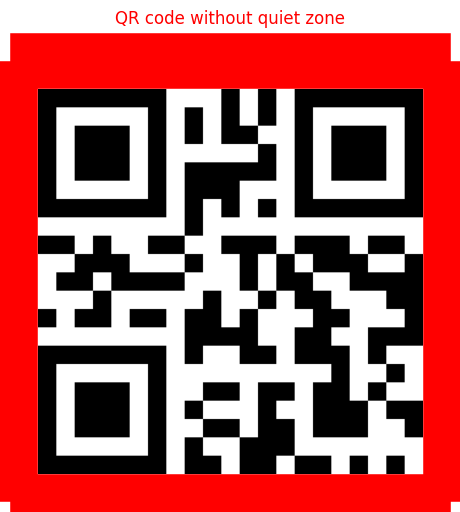

In [110]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

In [111]:
size = 0
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size += 1

print(size)

308


In [112]:
# Therefore the grid cell size is..
grid_cell_size = round(size/7)
print(qr_no_quiet_zone.shape[0])
print(grid_cell_size)

924
44


In [113]:
# And it each row/column is expected to have the following no. of qr_cells
grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)
print(grid_cells_num)

21


In [114]:
# So now it is time to split the following shape...
print(qr_no_quiet_zone.shape)

(924, 924)


In [121]:
# ...into grid cells
qr_cells = qr_no_quiet_zone.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(qr_cells.shape)

(21, 21, 44, 44)


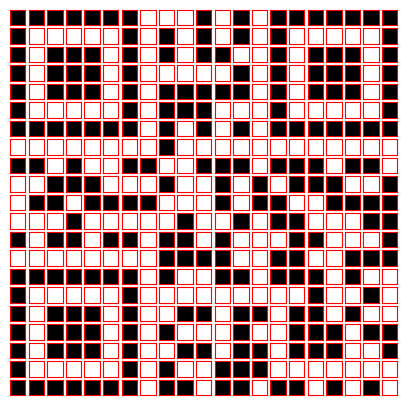

In [122]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

In [123]:
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric)

[[0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0]
 [1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0]
 [1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0]
 [0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1]
 [0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
 [0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0]
 [0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0]
 [0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1]]


In [124]:
# We want row #8
qr_cells_numeric[8]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=uint8)

In [125]:
# The first two bits determine the error correction level
ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
print(ecl)

[1, 1]


In [126]:
# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# Same row as above, the three cells after the ecl cells (converted to a string)
mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)

010


In [127]:
# Same row as above, but we want cells #5 and #7 (#6 is always set to 0),
#  followed by column #8 from cell #0 in it to cell #7 (and skipping #6)
fec = []
fec.append(qr_cells_numeric[8, 5])
fec.append(qr_cells_numeric[8, 7])
fec.extend(qr_cells_numeric[0:6, 8])
fec.extend(qr_cells_numeric[7:9, 8])
fec = [int(not(c)) for c in fec]
print(fec)

[0, 1, 0, 1, 1, 0, 1, 1, 1, 0]


In [128]:
# So in total we have the following 15 bits of format info from our QR code
print(ecl, mask, fec)

[1, 1] [0, 1, 0] [0, 1, 0, 1, 1, 0, 1, 1, 1, 0]


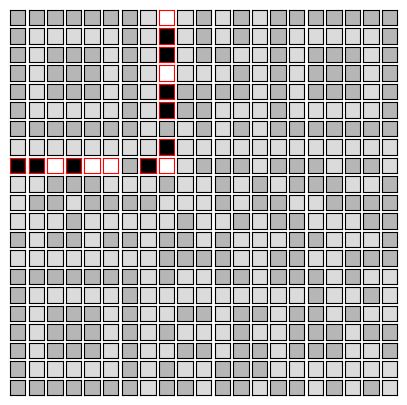

In [129]:
# Let's cross-check with our example
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):

        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        if (i == 8 and j <= 8) or (i <= 8 and j == 8):
            if (i != 6) and (j != 6):
                col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
                col.spines[:].set_color('red')
                continue
        col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

In [130]:
# However..... You need to XOR that with the "format mask": 101010000010010
ecl[0] ^= 1
mask[0] ^= 1
mask[2] ^= 1
fec[5] ^= 1
fec[8] ^= 1

# And now we print...
print(ecl, mask, fec)

[0, 1] [1, 1, 1] [0, 1, 0, 1, 1, 1, 1, 1, 0, 0]


In [131]:
# Before we proceed, let's write a function for masking to make our lives easier
UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"

def apply_mask(data_start_i, data_start_j, direction):
    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''
    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result

In [132]:
enc_bits = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
enc_int = int(''.join([str(bit) for bit in enc_bits]), 2)
print(f'{enc_bits} = Byte encoding (8 bits per character)')
# 0001	Numeric encoding (10 bits per 3 digits)
# 0010	Alphanumeric encoding (11 bits per 2 characters)
# 0100	Byte encoding (8 bits per character)
# 1000	Kanji encoding (13 bits per character)
# ...

[0, 1, 0, 0] = Byte encoding (8 bits per character)


In [133]:
len_bits = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

[0, 0, 0, 0, 1, 1, 0, 0] = 12 data symbols, each consisting of 8 bits


In [134]:
data_starting_indices = [
    [grid_cells_num-7,  grid_cells_num-1,  UP],    #    w    /     H
    [grid_cells_num-11, grid_cells_num-1,  CCW],   #    w    /     e
    [grid_cells_num-10, grid_cells_num-3,  DOWN],  #    w    /     l
    [grid_cells_num-6,  grid_cells_num-3,  DOWN],  #    .    /     l
    [grid_cells_num-2,  grid_cells_num-3,  CW],    #    w    /     o
    [grid_cells_num-3,  grid_cells_num-5,  UP],    #    i    /     ,
    [grid_cells_num-7,  grid_cells_num-5,  UP],    #    k    /  (space)
    [grid_cells_num-11, grid_cells_num-5,  CCW],   #    i    /     Q
    [grid_cells_num-10, grid_cells_num-7,  DOWN],  #    p    /     R
    [grid_cells_num-6,  grid_cells_num-7,  DOWN],  #    e    /  (space)
    [grid_cells_num-2,  grid_cells_num-7,  CW],    #    d    /     W
    [grid_cells_num-3,  grid_cells_num-9,  UP],    #    i    /     o
    [grid_cells_num-7,  grid_cells_num-9,  UP],    #    a    /     r
    [grid_cells_num-11, grid_cells_num-9,  UP],    #    .    /     l
    [grid_cells_num-16, grid_cells_num-9,  UP],    #    o    /     d
    [grid_cells_num-20, grid_cells_num-9,  CCW],   #    r    /     !
    [grid_cells_num-19, grid_cells_num-11, DOWN],  #    g    /     1
    [grid_cells_num-14, grid_cells_num-11, DOWN],  # End of message (Terminator)
    [grid_cells_num-12, grid_cells_num-11, DOWN],  # E1
    [grid_cells_num-8,  grid_cells_num-11, DOWN],  # E2
    [grid_cells_num-4,  grid_cells_num-11, DOWN],  # E3
    [grid_cells_num-9,  grid_cells_num-13, UP],    # E4
    [grid_cells_num-12, grid_cells_num-16, DOWN],  # E5
    [grid_cells_num-9,  grid_cells_num-18, UP],    # E6
    [grid_cells_num-12, grid_cells_num-20, DOWN],  # E7
]

00110000 (=048) = 0
00110001 (=049) = 1
00101101 (=045) = -
01000111 (=071) = G
01101111 (=111) = o
01101111 (=111) = o
01100100 (=100) = d
00100000 (=032) =  
01101010 (=106) = j
01101111 (=111) = o
01100010 (=098) = b
00100001 (=033) = !
0000...         = NULL TERMINATOR (END Symbol, SKIP!)
00001110 (=014) = 
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
00011110 (=030) = 
11000100 (=196) = Ä
01000011 (=067) = C
00100111 (=039) = '
01011111 (=095) = _
00111011 (=059) = ;
11110011 (=243) = ó
10010001 (=145) = 
10011000 (=152) = 


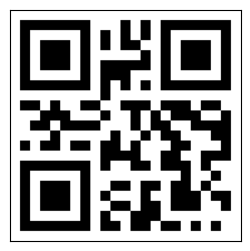

In [135]:
img = cv2.imread("01-Getting-started.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray')

start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]

size = 0
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size += 1

grid_cell_size = round(size/7)

grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)

qr_cells = qr_no_quiet_zone.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)

qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
mask_str = ''.join([str(c) for c in mask])

mask[0] ^= 1
mask[2] ^= 1

message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
for a, b, d in data_starting_indices:
    bits = apply_mask(a, b, d)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    if bit_string[:4] == "0000":
        print(f'{bit_string[:4]}...         = NULL TERMINATOR (END Symbol, SKIP!)')
        message_bits.extend(bits[:4])
    else:
        message_bits.extend(bits)
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')

# message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

# rsc = rs.RSCodec(nsym=7)

# try:
#     message_decoded = rsc.decode(message_bytes)
#     print("nice msg")
# except ReedSolomonError as e:
#     print(f"boo")

# if 'message_decoded' in locals():
#     data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:-4]
#     data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')

# #message_decoded = rsc.decode(message_bytes)



# print(f'Data in message = "{data_bytes[1:].decode(encoding="iso-8859-1")}"')
# print(f'Data should be... "1qaz!QAZ@WSX/\\\'[]"')

Test Case 2 -Matswar 3edel

In [25]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

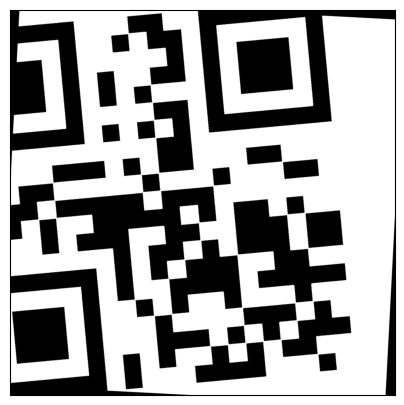

In [26]:
img = cv2.imread("02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img, -3)

kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(img, kernel, iterations=1)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(dilated_img, cmap='gray');

(21, 21)


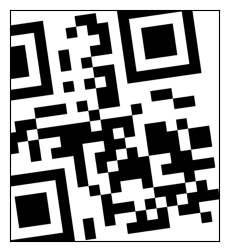

In [27]:
_, img = cv2.threshold(cv2.imread("02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE), 128, 255, cv2.THRESH_BINARY);

start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

img_no_quiet_zone = img[start_row:end_row, start_col:end_col]

# Alternative method to get the grid directly
# I directly resize it to 21x21 and use something like the replacement downscaling geometric transformation
# So for each collection of pixels, only one pixel survives, and since this is a perfect test case, it works
# In non-perfect test cases, you'd have needed to do some more steps to ensure correct replacement is done

img_21x21_grid = cv2.resize(img_no_quiet_zone, (21, 21), interpolation=cv2.INTER_AREA) // 255

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_no_quiet_zone, cmap='gray');
print(img_21x21_grid.shape)

In [28]:
img_inv = 1- img_21x21_grid

In [29]:
ecl = img_inv[8, 0:2]
mask = img_inv[8, 2:5]

print(ecl, mask)

[1 1] [1 1 1]


In [30]:
# Dictionary of all masks and their equivalent formulae
# P.S. I modified them to account for that I skipped the FEC mask part above
# If you will do it, do not XOR the mask if you wish to use this MASKS table
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i // 2 + j // 3) % 2 == 0,
    "010": lambda i, j: ((i + j) % 2 + (i * j) % 3) % 2 == 0,
    "011": lambda i, j: ((i * j) % 2 + (i * j) % 3) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}
# Enum for the different directions of reading blocks in the QR code
# The number indicates how many bytes are in this block
UP8, UP4, DOWN8, DOWN4, CW8, CCW8 = range(6)

In [31]:
# A more general apply_mask function (still works the same way)
def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
    result = []
    row_offsets = []
    col_offsets = []
    mask_str = ''.join([str(c) for c in mask])
    if (direction in [UP8, UP4]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction in [DOWN8, DOWN4]):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW8):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW8):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    for i, j in zip(row_offsets, col_offsets):
        cell_bit = bool(data[data_start_i+i, data_start_j+j])
        mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)
        # Modules corresponding to the dark areas of the mask are inverted.
        result.append(int(not cell_bit if mask_bit else cell_bit))
    return result[:4] if direction in [UP4, DOWN4] else result

In [32]:
enc_bits = apply_mask_general(21-1, 21-1, img_inv, mask, UP8)[:4]
print(enc_bits)
# 0001	Numeric encoding (10 bits per 3 digits)
# 0010	Alphanumeric encoding (11 bits per 2 characters)
# 0100	Byte encoding (8 bits per character)
# 1000	Kanji encoding (13 bits per character)
# ...

[0, 0, 1, 1]


In [33]:
len_bits = apply_mask_general(21-3, 21-1, img_inv, mask, UP8)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

[1, 1, 1, 1, 1, 1, 0, 1] = 253 data symbols, each consisting of 8 bits


In [34]:
block_starting_indices = [
    [21-7,  21-1,  UP8],
    [21-11, 21-1,  CCW8],
    [21-10, 21-3,  DOWN8],
    [21-6,  21-3,  DOWN8],
    [21-2,  21-3,  CW8],
    [21-3,  21-5,  UP8],
    [21-7,  21-5,  UP8],
    [21-11, 21-5,  CCW8],
    [21-10, 21-7,  DOWN8],
    [21-6,  21-7,  DOWN8],
    [21-2,  21-7,  CW8],
    [21-3,  21-9,  UP8],
    [21-7,  21-9,  UP8],
    [21-11, 21-9,  UP8],
    [21-16, 21-9,  UP8],
    [21-20, 21-9,  CCW8],
    [21-19, 21-11, DOWN8],
    [21-14, 21-11, DOWN4],  # Special 4-byte block, reserved for END (if exists!)
    [21-12, 21-11, DOWN8],
    [21-8,  21-11, DOWN8],
    [21-4,  21-11, DOWN8],
    [21-9,  21-13, UP8],
    [21-12, 21-16, DOWN8],
    [21-9,  21-18, UP8],
    [21-12, 21-20, DOWN8],
]

In [35]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
for _ in range(len(block_starting_indices)):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

11111111 (=255) = ÿ
01001101 (=077) = M
01010101 (=085) = U
01010101 (=085) = U
10100100 (=164) = ¤
10101010 (=170) = ª
10101010 (=170) = ª
10110111 (=183) = ·
11111111 (=255) = ÿ
11111111 (=255) = ÿ
11110101 (=245) = õ
01011101 (=093) = ]
01010101 (=085) = U
01010010 (=082) = R
01010101 (=085) = U
01011110 (=094) = ^
10101010 (=170) = ª
1010 (=010) = 

10101010 (=170) = ª
10101010 (=170) = ª
10101001 (=169) = ©
11111111 (=255) = ÿ
11111111 (=255) = ÿ
01010101 (=085) = U
11101010 (=234) = ê


In [36]:
print(f"Length of block_starting_indices: {len(block_starting_indices)}")
print(f"Current byte_index: {byte_index}")

if byte_index < len(block_starting_indices):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img3_inv, mask, dir)
    message_bits.extend(bits)
    print(bits)
    byte_index += 1
else:
    print(f"Error: byte_index {byte_index} is out of range.")


Length of block_starting_indices: 25
Current byte_index: 25
Error: byte_index 25 is out of range.


Test Case 3 - Leffy bina  

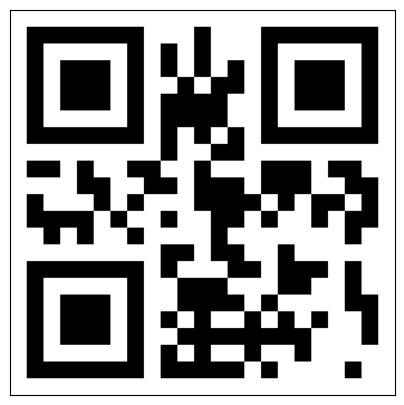

In [37]:
##Read the img and read it in grey scale
img = cv2.imread("03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)

##Flip the image 180 to the right 
img_3 = cv2.rotate(img, cv2.ROTATE_180)
##Plot the image
fig = plt.figure(figsize=(5,5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(img_3, cmap='gray')



(21, 21)


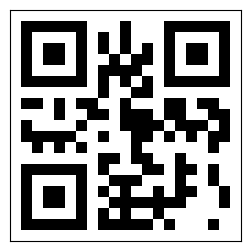

In [38]:
_, img_3 = cv2.threshold(cv2.imread("03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE), 128, 255, cv2.THRESH_BINARY);

img3 = cv2.rotate(img_3, cv2.ROTATE_180)

start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img3):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img3[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img3.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img3.shape[1] - col_index
            break
    if end_col != -1:
        break

img3_no_quiet_zone = img3[start_row:end_row, start_col:end_col]

# Alternative method to get the grid directly
# I directly resize it to 21x21 and use something like the replacement downscaling geometric transformation
# So for each collection of pixels, only one pixel survives, and since this is a perfect test case, it works
# In non-perfect test cases, you'd have needed to do some more steps to ensure correct replacement is done
img3_21x21_grid = cv2.resize(img3, (21, 21)) // 255

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3_21x21_grid, cmap='gray');
print(img3_21x21_grid.shape)

In [39]:
img3_inv = 1 - img3_21x21_grid

In [40]:
ecl3 = img3_inv[8, 0:2]
mask3 = img3_inv[8, 2:5]

print(ecl3, mask3)

[0 1] [1 0 1]


In [41]:
enc3_bits = apply_mask_general(21-1, 21-1, img3_inv, mask3, UP8)[:4]
print(enc3_bits)

[1, 0, 0, 1]


In [42]:
len3_bits = apply_mask_general(21-3, 21-1, img3_inv, mask3, UP8)
len3_int = int(''.join([str(bit) for bit in len3_bits]), 2)
print(f'{len3_bits} = {len3_int} data symbols, each consisting of 8 bits')

[1, 0, 0, 0, 1, 1, 0, 1] = 141 data symbols, each consisting of 8 bits


In [43]:
print(f"Length of block_starting_indices: {len(block_starting_indices)}")
print(f"Current byte_index: {byte_index}")

message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
for _ in range(len(block_starting_indices)):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img3_inv, mask3, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

Length of block_starting_indices: 25
Current byte_index: 25
10011000 (=152) = 
11001111 (=207) = Ï
11000100 (=196) = Ä
11100110 (=230) = æ
11101001 (=233) = é
10000100 (=132) = 
01001011 (=075) = K
01001111 (=079) = O
11100111 (=231) = ç
01111011 (=123) = {
11101010 (=234) = ê
10101000 (=168) = ¨
00101110 (=046) = .
01101010 (=106) = j
00011110 (=030) = 
01101011 (=107) = k
00111110 (=062) = >
0100 (=004) = 
11000110 (=198) = Æ
00101000 (=040) = (
10001010 (=138) = 
10111010 (=186) = º
11010100 (=212) = Ô
00010110 (=022) = 
10110001 (=177) = ±


In [44]:
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.9.0


Test Case 4 -Black Mirror

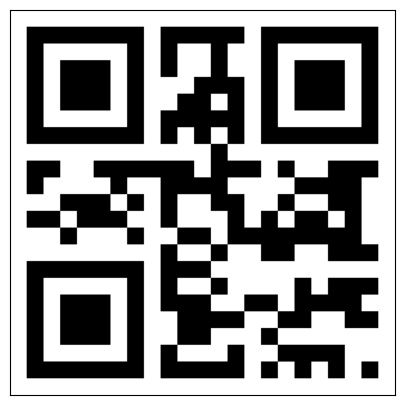

In [71]:
##Read the img and read it in grey scale
img_4 = cv2.imread("04-Black-mirror.png", cv2.IMREAD_GRAYSCALE)

##Invert the grayscale image
inverted_img = cv2.bitwise_not(img_4) 
#rotated_img= cv2.rotate(inverted_img, cv2.ROTATE_180)

rotated_img = cv2.rotate(inverted_img, cv2.ROTATE_90_CLOCKWISE)
rotated_img = cv2.rotate(rotated_img, cv2.ROTATE_180)



##Plot the image
fig = plt.figure(figsize=(5,5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(rotated_img, cmap='gray')


(21, 21)


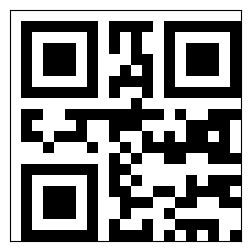

In [72]:
#_, img4 = cv2.threshold(cv2.imread("04-Black-mirror.png", cv2.IMREAD_GRAYSCALE), 128, 255, cv2.THRESH_BINARY);

img4 = cv2.imread("04-Black-mirror.png", cv2.IMREAD_GRAYSCALE)

##Invert the grayscale image
inverted_img = cv2.bitwise_not(img4) 
#rotated_img= cv2.rotate(inverted_img, cv2.ROTATE_180)

rotated_img = cv2.rotate(inverted_img, cv2.ROTATE_90_CLOCKWISE)
rotated_img = cv2.rotate(rotated_img, cv2.ROTATE_180)

start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img4):
    if (row != 255).any():
        start_row = row_index
        break

for row_index, row in enumerate(img4[::-1]):
    if (row != 255).any():
        end_row = img4.shape[0] - row_index
        break

for col_index, col in enumerate(cv2.transpose(img4)):
    if (col != 255).any():
        start_col = col_index
        break

for col_index, col in enumerate(cv2.transpose(img4)[::-1]):
    if (col != 255).any():
        end_col = img4.shape[1] - col_index
        break

img_4_no_quiet_zone = rotated_img[start_row:end_row, start_col:end_col]

# Alternative method to get the grid directly
# I directly resize it to 21x21 and use something like the replacement downscaling geometric transformation
# So for each collection of pixels, only one pixel survives, and since this is a perfect test case, it works
# In non-perfect test cases, you'd have needed to do some more steps to ensure correct replacement is done
img_4_21x21_grid = cv2.resize(img_4_no_quiet_zone, (21, 21), interpolation=cv2.INTER_NEAREST) // 255

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_4_21x21_grid, cmap='gray');
print(img_4_21x21_grid.shape)

In [73]:
img4_inv = 1 - img_4_21x21_grid

In [74]:
ecl4 = img4_inv[8, 0:2]
mask4 = img4_inv[8, 2:5]

print(ecl4, mask4)

[0 0] [0 0 0]


In [75]:
enc4_bits = apply_mask_general(21-1, 21-1, img4_inv, mask4, UP8)[:4]
print(enc4_bits)

[1, 0, 0, 0]


In [76]:
len_bits = apply_mask_general(21-3, 21-1, img4_inv, mask, UP8)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

[0, 0, 1, 1, 0, 1, 1, 1] = 55 data symbols, each consisting of 8 bits


In [77]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
for _ in range(len(block_starting_indices)):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img4_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

00110101 (=053) = 5
01110001 (=113) = q
11010010 (=210) = Ò
00011010 (=026) = 
01001110 (=078) = N
01101111 (=111) = o
01001011 (=075) = K
11000100 (=196) = Ä
10111000 (=184) = ¸
00110010 (=050) = 2
00100100 (=036) = $
10011011 (=155) = 
10110000 (=176) = °
11011100 (=220) = Ü
00011111 (=031) = 
01100110 (=102) = f
00000111 (=007) = 
0001 (=001) = 
10100011 (=163) = £
00100010 (=034) = "
11110010 (=242) = ò
01000011 (=067) = C
10001100 (=140) = 
00111011 (=059) = ;
11111101 (=253) = ý


Test Case 5 (another approach)

el successful approach (i think)

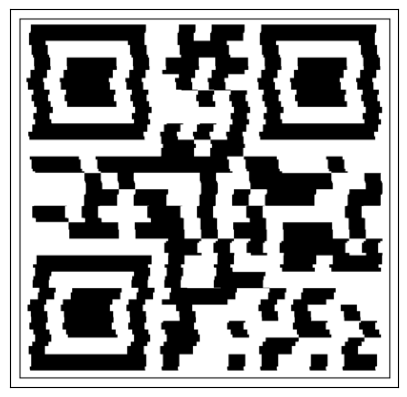

In [89]:
img5 = cv2.imread("TC-5.png", cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img5, cmap='gray');

ValueError: cannot reshape array of size 147042 into shape (9,44,9,44)

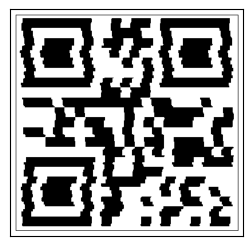

In [159]:
img5 = cv2.imread("TC-5.png", cv2.IMREAD_GRAYSCALE)
_, img5 = cv2.threshold(img5, 128, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img5, cmap='gray')

start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img5):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img5[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img5.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img5)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img5)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img5.shape[1] - col_index
            break
    if end_col != -1:
        break

qr_no_quiet_zone_5 = img5[start_row:end_row, start_col:end_col]

size = 0
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size += 1

grid_cell_size_5 = round(size/7)

grid_cells_num_5 = round(qr_no_quiet_zone_5.shape[0]/grid_cell_size_5)

qr_cells_5 = qr_no_quiet_zone_5.reshape((
    grid_cells_num_5,
    grid_cell_size_5,
    grid_cells_num_5,
    grid_cell_size_5,
)).swapaxes(1, 2)

qr_cells_numeric_5 = np.ndarray((grid_cells_num_5, grid_cells_num_5), dtype=np.uint8)
for i, row in enumerate(qr_cells_5):
    for j, cell in enumerate(row):
        qr_cells_numeric_5[i, j] = (np.median(cell) // 255)

mask5 = [int(not(c)) for c in qr_cells_numeric_5[8, 2:5]]
mask_str_5 = ''.join([str(c) for c in mask5])

mask5[0] ^= 1
mask5[2] ^= 1

enc_bits_5 = apply_mask(grid_cells_num_5 -1, grid_cells_num_5 -1, UP_ENC)
enc_int_5 = int(''.join([str(bit5) for bit5 in enc_bits_5]), 2)

len_bits_5 = apply_mask(grid_cells_num_5 -3, grid_cells_num_5 -1, UP)
len_int_5 = int(''.join([str(bit5) for bit5 in len_bits_5]), 2)

message_bits_5 = []
message_bits_5.extend(enc_bits_5)
message_bits_5.extend(len_bits_5)
for a, b, d in data_starting_indices:
    bits5 = apply_mask(a, b, d)
    bit_string_5 = ''.join([str(bit5) for bit5 in bits5])
    alpha_char_5 = chr(int(bit_string, 2))
    if bit_string_5[:4] == "0000":
        print(f'{bit_string_5[:4]}...         = NULL TERMINATOR (END Symbol, SKIP!)')
        message_bits_5.extend(bits5[:4])
    else:
        message_bits_5.extend(bits5)
    print(f'{bit_string_5} (={int(bit_string_5, 2):03d}) = {alpha_char_5}')

# message_bits_5 = []
# for i in range(qr_cells_numeric_5.shape[0]):
#         for j in range(qr_cells_numeric_5.shape[1]):
#             message_bits_5.append(qr_cells_numeric_5[i, j])

# def bits_to_string(bits):
#         chars = []
#         for i in range(0, len(bits), 8):
#             byte = bits[i:i+8]
#             if len(byte) < 8:
#                 continue
#             char_code = int(''.join(map(str, byte)), 2)
#             char = chr(char_code) if 32 <= char_code <= 126 else f'({char_code})'  # Display non-printable chars as code
#             chars.append(char)
#             print(f'{"".join(map(str, byte))} (={char_code:03d}) = {char}')
#         return ''.join(chars)

# message_string = bits_to_string(message_bits)
# print(f'Decoded Message: "{message_string}"')

###################################################################################

# message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

# rsc = rs.RSCodec(nsym=7)

# try:
#     message_decoded = rsc.decode(message_bytes)
#     print("nice msg")
# except ReedSolomonError as e:
#     print(f"boo")

# if 'message_decoded' in locals():
#     data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:-4]
#     data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')

# #message_decoded = rsc.decode(message_bytes)



# print(f'Data in message = "{data_bytes[1:].decode(encoding="iso-8859-1")}"')
# print(f'Data should be... "1qaz!QAZ@WSX/\\\'[]"')

Test Case 5 (trial 2)

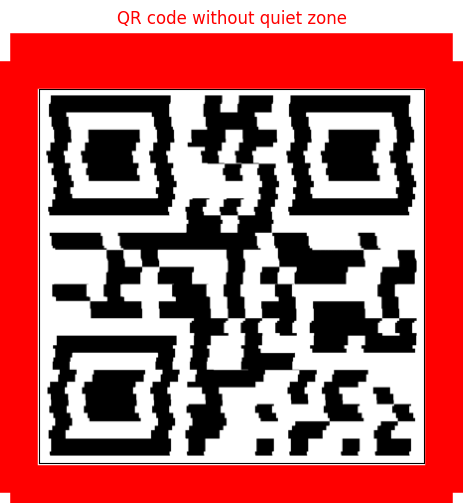

In [116]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img5):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img5[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img5.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img5)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img5)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img5.shape[1] - col_index
            break
    if end_col != -1:
        break

qr_no_quiet_zone_5 = img5[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone_5, cmap='gray');

In [117]:
print(qr_no_quiet_zone_5.shape)

(380, 391)


In [118]:
grid_cell_size_5 = round(size/7)
print(grid_cell_size_5)


44


In [119]:
grid_cells_num_5 = round(qr_no_quiet_zone_5.shape[0]/grid_cell_size_5)
print(grid_cells_num_5)

9


In [120]:
qr_cells_5 = qr_no_quiet_zone_5.reshape((
    grid_cells_num_5,
    grid_cell_size_5,
    grid_cells_num_5,
    grid_cell_size_5,
)).swapaxes(1, 2)
print(qr_cells_5.shape)

qr_cells_numeric_5 = np.ndarray((grid_cells_num_5, grid_cells_num_5), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric_5[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric_5)

ValueError: cannot reshape array of size 148580 into shape (9,44,9,44)

Test case 5: Ceaser Cipher

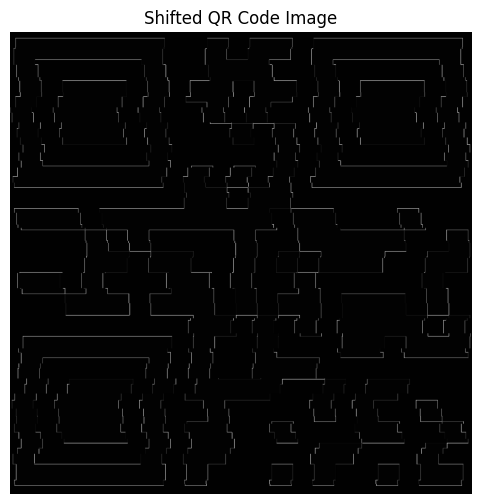

In [48]:
import cv2
import matplotlib.pyplot as plt

# Load the encrypted QR code image
encrypted_qr_image = cv2.imread("05-Caesar-cipher.png", cv2.IMREAD_GRAYSCALE)

# Apply the Caesar Cipher shift
shift_value = 2  # Example shift value
shifted_image = (encrypted_qr_image + shift_value) % 256
##inverted_image = cv2.bitwise_not(shifted_image)
# Display the shifted QR code image as a plot
plt.figure(figsize=(6, 6))
plt.imshow(shifted_image, cmap='gray')
plt.axis('off')
plt.title("Shifted QR Code Image")
plt.show()


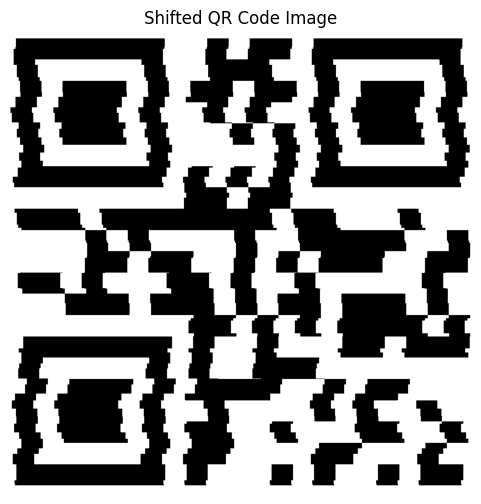

In [49]:
import cv2
import matplotlib.pyplot as plt

# Load the encrypted QR code image
encrypted_qr_image = cv2.imread("05-Caesar-cipher.png", cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary
_, binary_image = cv2.threshold(encrypted_qr_image, 128, 255, cv2.THRESH_BINARY)

# Invert the binary image
inverted_binary_image = cv2.bitwise_not(binary_image)

# Apply the Caesar Cipher shift to the inverted binary image
shift_value = 2  # Example shift value
shifted_image = (inverted_binary_image + shift_value) % 256

# Display the shifted QR code image as a plot
plt.figure(figsize=(6, 6))
plt.imshow(shifted_image, cmap='gray')
plt.axis('off')
plt.title("Shifted QR Code Image")
plt.show()


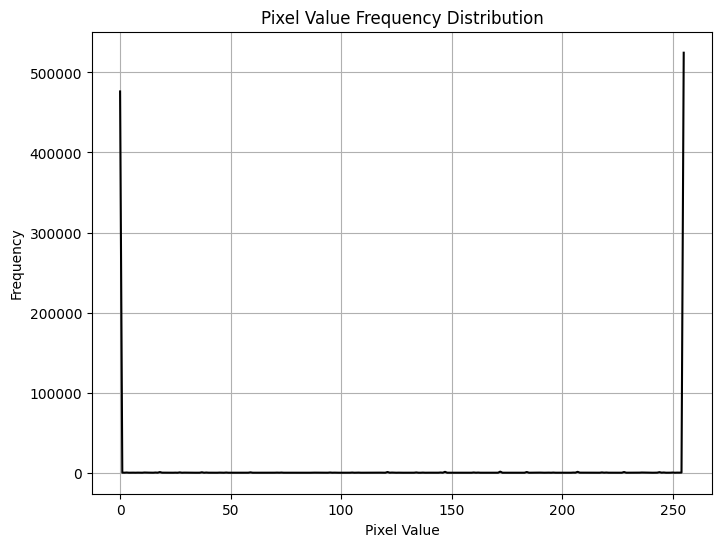

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the encrypted image
encrypted_image = cv2.imread("05-Caesar-cipher.png", cv2.IMREAD_GRAYSCALE)

# Calculate histogram of pixel values
histogram = np.histogram(encrypted_image, bins=256, range=(0, 255))[0]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Frequency Distribution')
plt.grid(True)
plt.show()


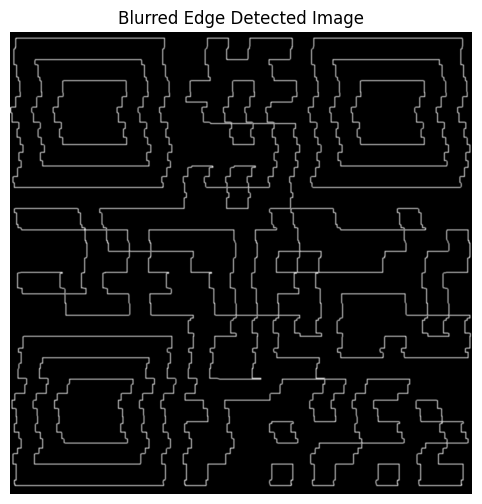

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the encrypted image
encrypted_image = cv2.imread("05-Caesar-cipher.png", cv2.IMREAD_GRAYSCALE)

# Perform edge detection
edges = cv2.Canny(encrypted_image, 100, 200)

# Apply Gaussian blur to the edge-detected image
blurred_edges = cv2.GaussianBlur(edges, (5, 5), 0)

# Display the blurred edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(blurred_edges, cmap='gray')
plt.axis('off')
plt.title('Blurred Edge Detected Image')
plt.show()


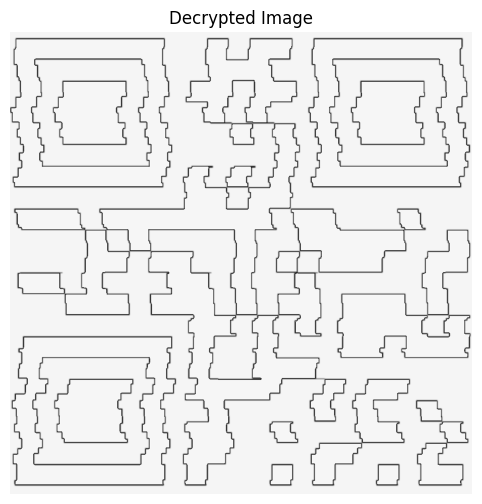

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert to grayscale
img_path = "05-Caesar-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur for smoothing
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Define the Caesar cipher shift value
shift_value = 10

# Perform decryption by shifting pixel values
decrypted_img = (blurred_img - shift_value) % 256

# Display the decrypted image
plt.figure(figsize=(8, 6))
plt.imshow(decrypted_img, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()


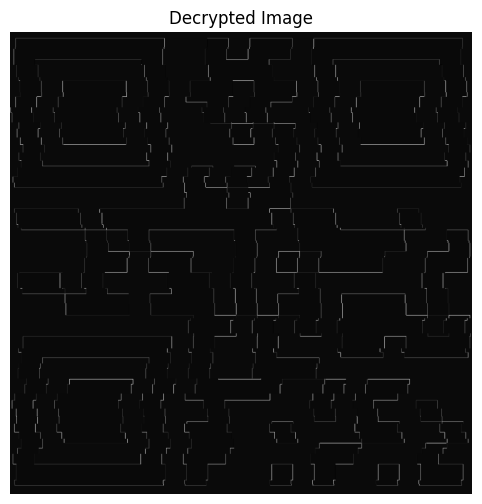

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert to grayscale
img_path = "05-Caesar-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define the black and white thresholds
black_threshold = 100  # Adjust as needed
white_threshold = 200  # Adjust as needed

# Define the Caesar cipher shift value
shift_value = 10

# Perform decryption by shifting pixel values and adjusting to maintain black and white pixels
decrypted_img = img.copy()
decrypted_img[img <= black_threshold] = np.clip((img[img <= black_threshold] - shift_value), 0, 255)
decrypted_img[img >= white_threshold] = np.clip((img[img >= white_threshold] - shift_value), 0, 255)

inverted_img = cv2.bitwise_not(decrypted_img)
# Display the decrypted image
plt.figure(figsize=(8, 6))
plt.imshow(inverted_img, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()


Test case 6 -Railfence-chiper 

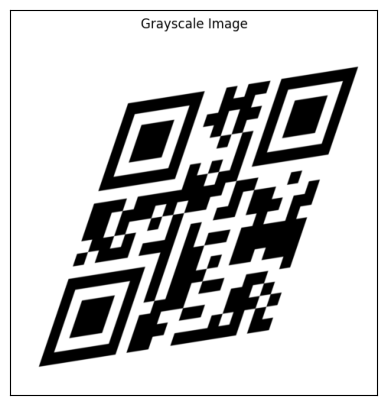

In [147]:
img6 = cv2.imread("TC-6.png", cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img6, cmap='gray');